<a href="https://colab.research.google.com/github/rathi9497/GOOGLE-PLAYSTORE-DATA-AND-USER-REVIEWS-ANALYSIS/blob/main/FINAL_PLAYSTORE_DATASET_EDA_Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Team Member 1 -**  - Prathamesh Anil Rathi


# **Project Name**    -
GOOGLE PLAYSTORE DATA AND USER REVIEWS ANALYSIS



# **Project Summary -**

Google playstore aplication and mobile application reviews are everywhere. It is easy to create and because of these factor day by day more and more apps are being developed. In this notebook I am going to analyse the playstore application data and its user reviews around 10,000's of apps. Here we compare apps with different categories . We analyse playstore data based on reviews and rating and try to look at free and paid application reviews and rating , avarage rating , highest rating , minimum rating.

here we look for insites in data which can help in drive for the success of apps.

the are two dataset are given that is google playstore data and its user reviws data .

# **GitHub Link -**

https://github.com/rathi9497/GOOGLE-PLAYSTORE-DATA-AND-USER-REVIEWS-ANALYSIS

# **Problem Statement**


What are the top categories on Play Store? Are majority of the apps Paid or Free? How important is the rating of the application? Which categories from the audience should the app be based on? Which category has the most no. of installations? How does the count of apps varies by Genres? How does the last update has an effect on the rating? How are ratings affected when the app is a paid one? How are reviews and ratings co-related? Lets us discuss the sentiment subjectivity. Is subjectivity and polarity proportional to each other? What is the percentage of review sentiments?


# **Define Your Business Objective?**


Our bussiness objective is to find the problem behind the bad review and sort out the problem and main goal is to get good rating and reviews from the user to get better stand in the market. We also have to get good rating, good reviews , maximize our download, and improve our apps proformance based on the customer reviews and sentiment analysis.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline
import seaborn as sns

### Dataset Loading

In [2]:
# Load Dataset
#  first we have to import drive if our data is in google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# load dataset
playstore_data_file = '/content/drive/MyDrive/data/Play Store Data.csv'
user_review_file = '/content/drive/MyDrive/data/User Reviews.csv'

playstore_data = pd.read_csv(playstore_data_file)
user_review_data = pd.read_csv(user_review_file)

# Dataset First View

In [4]:
# Dataset First Look
# head function give us the top 5 row of data and tail function botton 5 rows
pd.concat([playstore_data.head(),playstore_data.tail()])

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


**Dataset Rows & Columns coun**t

In [5]:
# Dataset Rows & Columns count
print(playstore_data.columns)
rows = playstore_data.shape[0]
column = playstore_data.shape[1]
print('')
print(f'the number of rows is {rows} and column is {column} .')

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

the number of rows is 10841 and column is 13 .


 **Dataset Information**

In [6]:
# Dataset Info
playstore_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


**Duplicate Values**

In [7]:
# Dataset Duplicate Value Count
playstore_data[playstore_data.duplicated()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,Varies with device,"10,000,000+",Free,0,Everyone,Productivity,"April 6, 2018",Varies with device,Varies with device
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,Varies with device,"1,000,000+",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,Varies with device,"100,000,000+",Free,0,Everyone,Productivity,"June 27, 2018",Varies with device,Varies with device
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86M,"10,000+",Free,0,Everyone,Medical,"June 1, 2018",0.6.88,5.0 and up


**Missing Values/Null Values**

In [8]:
# Missing Values/Null Values Count
def playstore_info():
  temp = pd.DataFrame(index=playstore_data.columns)
  temp['data_types'] = playstore_data.dtypes
  temp['not null value'] = playstore_data.count()
  temp['null values'] = playstore_data.isnull().sum()
  temp['%of null value'] = playstore_data.isnull().mean()
  temp['unique count'] = playstore_data.nunique()
  return temp

playstore_info()

,data_types,not null value,null values,%of null value,unique count
App,object,10841,0,0.000000,9660
Category,object,10841,0,0.000000,34
Rating,float64,9367,1474,0.135965,40
Reviews,object,10841,0,0.000000,6002
Size,object,10841,0,0.000000,462
Installs,object,10841,0,0.000000,22
Type,object,10840,1,0.000092,3
Price,object,10841,0,0.000000,93
Content Rating,object,10840,1,0.000092,6
Genres,object,10841,0,0.000000,120


Lets first deal with the columns which contains lesser number of NaN values. By going to drop these nan containg row because of lesser number of row in nan.

In [9]:
playstore_data['App'].value_counts()

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: App, Length: 9660, dtype: int64

In [10]:
# dropping duplicates from the 'App' column.
playstore_data.drop_duplicates(subset = 'App', inplace = True)
playstore_data.shape

(9660, 13)

In [11]:
#  now there is no any duplicates found
playstore_data[playstore_data['App'].duplicated()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [12]:
# The rows containing NaN values in the Android Ver column
playstore_data[playstore_data['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [13]:
# dropping rows corresponding to the to the NaN values in the 'Android Ver' column.
playstore_data=playstore_data[playstore_data['Android Ver'].notna()]
# Shape of the updated dataframe
playstore_data.shape

(9657, 13)

In [14]:
# The rows containing NaN values in the Current Ver column.
playstore_data[playstore_data['Current Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11k,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8.7M,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
6803,BT Master,FAMILY,NaN,0,222k,100+,Free,0,Everyone,Education,"November 6, 2016",NaN,1.6 and up
7333,Dots puzzle,FAMILY,4.0,179,14M,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up
7407,Calculate My IQ,FAMILY,NaN,44,7.2M,"10,000+",Free,0,Everyone,Entertainment,"April 3, 2017",NaN,2.3 and up
7730,UFO-CQ,TOOLS,NaN,1,237k,10+,Paid,$0.99,Everyone,Tools,"July 4, 2016",NaN,2.0 and up
10342,La Fe de Jesus,BOOKS_AND_REFERENCE,NaN,8,658k,"1,000+",Free,0,Everyone,Books & Reference,"January 31, 2017",NaN,3.0 and up


In [15]:
# dropping rows corresponding to the values which contain NaN in the column 'Current Ver'.
playstore_data = playstore_data[playstore_data['Current Ver'].notna()]
# Shape of the updated dataframe
playstore_data.shape

(9649, 13)

In [16]:
# there is only one nan value in type column
playstore_data[playstore_data['Type'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [17]:
# Replacing the nan value in 'Type' column corresponding to row index 9148 with 'Free'
playstore_data.loc[9148,'Type'] = 'Free'

In [18]:
playstore_data[playstore_data['Type'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


<Axes: >

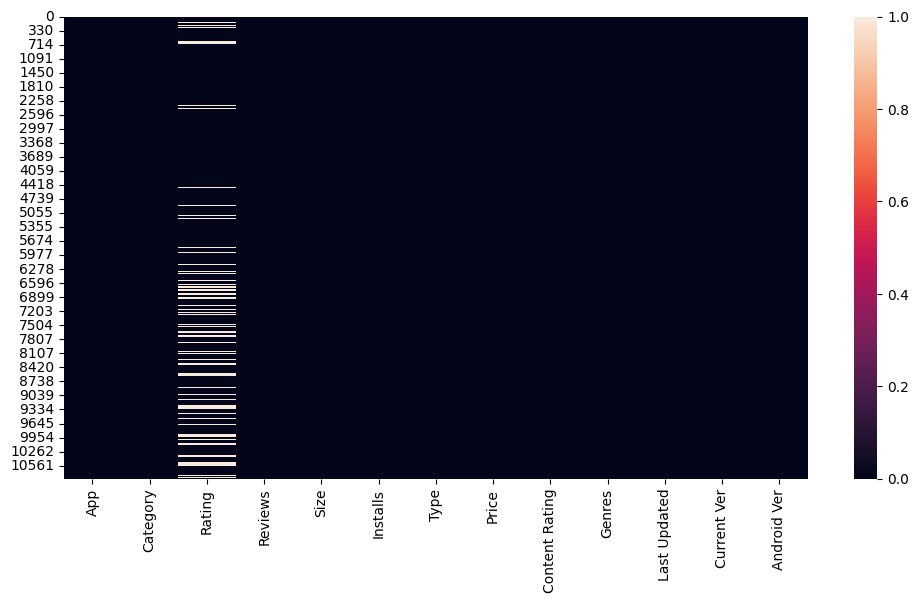

In [19]:
# Visualizing the missing values
plt.figure(figsize=(12,6))
sns.heatmap(playstore_data.isnull())

**What did you know about your dataset?**

Playstore apps data is given to analyse and get some insights to improve the sucess drive for the application. Here 13 columns is given in data category wise application rating and reviews and two type of application that is free or paid. Current version , android version and last updated history is given. Here we tried to know the data and got some correlation in data . Which we did not got till now. So we have to change the datatype in (int or float) of all other column which contain numerical values and we also found the number of null values are: Rating has 1474 null values which contributes 13.60% of the data.  We cannot drop them because it effect our data set in getting insights.

# *2. Understanding Your Variables*

In [20]:
# Dataset Columns
playstore_data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [21]:
# Dataset Describe
playstore_data.describe()

,Rating
count,8190.000000
mean,4.173321
std,0.536691
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,5.000000


**Variables Description**

Column information in dataset:-

1.App - It tells us about the name of the application with a short description

2.Category - It gives the category to the app.

3.Rating - It contains the average rating the respective app received from its users.

4.Reviews - It tells us about the total number of users who have given a review for the application.

5.Size - It tells us about the size being occupied the application on the mobile phone.

6.Installs - It tells us about the total number of installs/downloads for an application.

7.Type - It states whether an app is free to use or paid.

8.Price - It gives the price payable to install the app. For free type apps, the price is zero.

9.Content Rating - It states whether or not an app is suitable for all age groups or not.

10.Genres - It tells us about the various other categories to which an application can belong.

11.Last Updated - It tells us about the when the application was updated.

12.Current Ver - It tells us about the current version of the application.

13.Android Ver - It tells us about the android version

**Check Unique Values for each variable.**

In [22]:
# Check Unique Values for each variable.

def unique_value():
  temp1 = pd.DataFrame(index=playstore_data.columns)
  temp1['unique_value_count'] = playstore_data.nunique()
  return temp1

unique_value()

,unique_value_count
App,9649
Category,33
Rating,39
Reviews,5328
Size,457
Installs,21
Type,2
Price,92
Content Rating,6
Genres,118


# 3. *Data Wrangling*

**Data Wrangling Code**

In [23]:
# Write your code to make your dataset analysis ready.
  # Changing the datatype of the Last Updated column from string to datetime.
playstore_data['Last Updated']=pd.to_datetime(playstore_data["Last Updated"])
playstore_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [24]:
#  changing the datatype of 'Reviews' column  to int
playstore_data['Reviews'] = playstore_data['Reviews'].astype(int)
playstore_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [25]:
# Converting the values in theSizecolumn to a same unit of measure(MB)
playstore_data['Size'].value_counts()

Varies with device    1227
12M                    181
11M                    181
13M                    177
14M                    176
                      ... 
721k                     1
430k                     1
429k                     1
200k                     1
619k                     1
Name: Size, Length: 457, dtype: int64

### Dataset Information

We can see that the values in the Size column contains data with different units. 'M' stands for MB and 'k' stands for KB. To easily analyse this column, it is necessary to convert all the values to a single unit. In this case, we will convert all the units to MB.

We know that 1MB = 1024KB, to convert KB to MB, we must divide all the values which are in KB by 1024

In [26]:
# function to convert all the entries in KB to MB and then converting them to float datatype.

def convert_kb_to_mb(val):
  '''
  This function converts all the valid entries in KB to MB and returns the result in float datatype.
  '''
  try:
    if 'M' in val:
      return float(val[:-1])
    elif 'k' in val:
      return round(float(val[:-1])/1024, 4)
    else:
      return val
  except:
    return val

In [27]:
playstore_data['Size']=playstore_data['Size'].apply(lambda x: convert_kb_to_mb(x))
playstore_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [28]:
# now i am converting 'varies with device' to 'Nan' value
playstore_data['Size'] = playstore_data['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
playstore_data['Size'] = playstore_data['Size'].apply(lambda x: float(x))

In [29]:
#  now here we can see that the size column 'varies with device is replaced with' 'nan'
playstore_data[playstore_data['Size'].isnull()].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
37,Floor Plan Creator,ART_AND_DESIGN,4.1,36639,NaN,"5,000,000+",Free,0,Everyone,Art & Design,2018-07-14,Varies with device,2.3.3 and up
42,Textgram - write on photos,ART_AND_DESIGN,4.4,295221,NaN,"10,000,000+",Free,0,Everyone,Art & Design,2018-07-30,Varies with device,Varies with device
52,Used Cars and Trucks for Sale,AUTO_AND_VEHICLES,4.6,17057,NaN,"1,000,000+",Free,0,Everyone,Auto & Vehicles,2018-07-30,Varies with device,Varies with device
67,Ulysse Speedometer,AUTO_AND_VEHICLES,4.3,40211,NaN,"5,000,000+",Free,0,Everyone,Auto & Vehicles,2018-07-30,Varies with device,Varies with device
68,REPUVE,AUTO_AND_VEHICLES,3.9,356,NaN,"100,000+",Free,0,Everyone,Auto & Vehicles,2018-05-25,Varies with device,Varies with device


In [30]:
# Finding max, min, mean, and median in the Size column.

max_size = playstore_data['Size'].max()
min_size = playstore_data['Size'].min()
mean_size = round(playstore_data['Size'].mean(),4)
median_size = playstore_data['Size'].median()

[max_size, min_size, mean_size, median_size]

[100.0, 0.0083, 20.4136, 12.0]

In [31]:
# making a function for for removing '+'

def convert_plus(val):
  '''
  This function drops the + symbol if present and returns the value with int datatype.
  '''
  if '+' and ',' in val:
    new = int(val[:-1].replace(',',''))
    return new
  elif '+' in val:
    new1 = int(val[:-1])
    return new1
  else:
    return int(val)

In [32]:
#  now after apply convert function '+' is removed

playstore_data['Installs']=playstore_data['Installs'].apply(lambda x : convert_plus(x))

In [33]:
playstore_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [34]:
# Changing the datatype of the 'Price' column from string to float
playstore_data['Price'].value_counts()

0          8896
$0.99       143
$2.99       124
$1.99        73
$4.99        70
           ... 
$18.99        1
$389.99       1
$19.90        1
$1.75         1
$1.04         1
Name: Price, Length: 92, dtype: int64

In [35]:
#  making function for removing '$' and changing datatype of column 'price'
def replace_dollor(val):
  if '$' in val:
    new = float(val.replace('$',''))
    return new
  else:
    return float(val)

In [36]:
playstore_data['Price'] = playstore_data['Price'].apply(lambda x:replace_dollor(x))

In [37]:
playstore_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9649 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9649 non-null   object        
 1   Category        9649 non-null   object        
 2   Rating          8190 non-null   float64       
 3   Reviews         9649 non-null   int64         
 4   Size            8422 non-null   float64       
 5   Installs        9649 non-null   int64         
 6   Type            9649 non-null   object        
 7   Price           9649 non-null   float64       
 8   Content Rating  9649 non-null   object        
 9   Genres          9649 non-null   object        
 10  Last Updated    9649 non-null   datetime64[ns]
 11  Current Ver     9649 non-null   object        
 12  Android Ver     9649 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(7)
memory usage: 1.3+ MB


In [38]:
playstore_data.describe()

,Rating,Reviews,Size,Installs,Price
count,8190.000000,9.649000e+03,8422.000000,9.649000e+03,9649.000000
mean,4.173321,2.168145e+05,20.413556,7.785404e+06,1.100079
std,0.536691,1.832255e+06,21.833485,5.378557e+07,16.860857
min,1.000000,0.000000e+00,0.008300,0.000000e+00,0.000000
25%,4.000000,2.500000e+01,4.600000,1.000000e+03,0.000000
50%,4.300000,9.690000e+02,12.000000,1.000000e+05,0.000000
75%,4.500000,2.944500e+04,28.000000,1.000000e+06,0.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


In [39]:
playstore_data.corr()

<ipython-input-39-4b427162fc82>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  playstore_data.corr()


,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.055076,0.062975,0.040131,-0.021215
Reviews,0.055076,1.000000,0.179275,0.625158,-0.007603
Size,0.062975,0.179275,1.000000,0.134216,-0.022494
Installs,0.040131,0.625158,0.134216,1.000000,-0.009412
Price,-0.021215,-0.007603,-0.022494,-0.009412,1.000000


<ipython-input-40-dd0590aaac97>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(playstore_data.corr(),annot=True)


Text(0.5, 1.0, 'correlation of heatmap for playstore data')

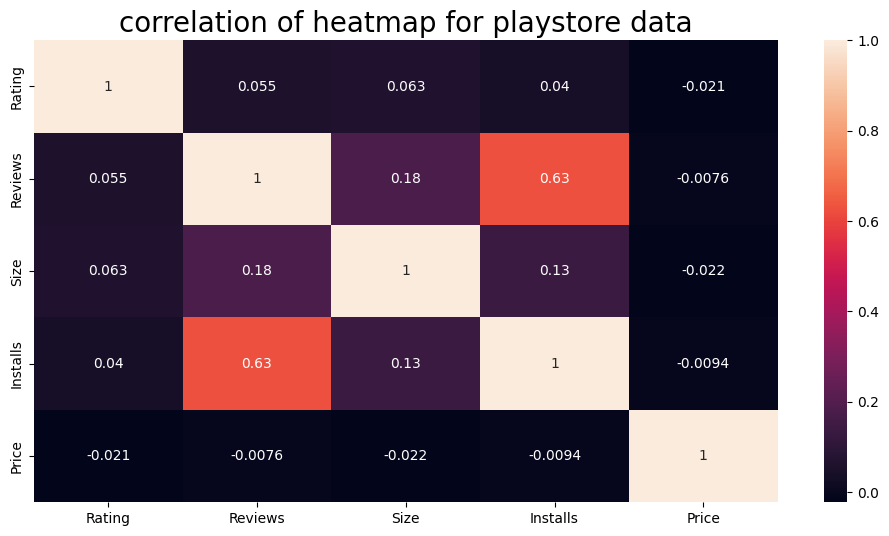

In [40]:
# Visualizing the correlation
plt.figure(figsize=(12,6))
sns.heatmap(playstore_data.corr(),annot=True)
plt.title('correlation of heatmap for playstore data',size =20)

-1 means if one column(variable) is present, the other is almost certainly absent (AKA: strong negative correlation, or yellow color)

-0 means there is no dependence between the columns(variables)

-1 means if one column(variable) is present, the other is also certainly present.

The Price is slightly negatively correlated with the Rating, Reviews, and Installs. This means that as the prices of the app increases, the average rating, total number of reviews and Installs fall slightly. The Rating is slightly positively correlated with the Installs and Reviews column. This indicates that as the the average user rating increases, the app installs and number of reviews also increase.

Now that we have handled the errors and NaN values in the playstoredata.csv file, lets do the same for the userreviews.csv file.

In [41]:
# showing the top 5 rows
user_review_data.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [42]:
user_review_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [43]:
# Checking shape and column in dataframe
print(user_review_data.columns)
rows=user_review_data.shape[0]
columns=user_review_data.shape[1]
print('')
print(f"the no. of rows is {rows} and no. of columns is {columns}")

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

the no. of rows is 64295 and no. of columns is 5


The no. of rows is 64295 and no. of columns is 5.
Defining the variable or column what we got from the user reviews dataset

App: Contains the name of the app with a short description (optional).

Translated_Review: It contains the English translation of the review dropped by the user of the app.

Sentiment: It gives the attitude/emotion of the writer. It can be ‘Positive’, ‘Negative’, or ‘Neutral’.

Sentiment_Polarity: It gives the polarity of the review. Its range is [-1,1], where 1 means ‘Positive statement’ and -1 means a ‘Negative statement’.

Sentiment_Subjectivity: This value gives how close a reviewers opinion is to the opinion of the general public. Its range is [0,1]. Higher the subjectivity, closer is the reviewers opinion to the opinion of the general public, and lower subjectivity indicates the review is more of a factual information.

In [44]:
#  now i am trying to find null/missing values , count, unique and datatype of user_review data

def u_r_info():
  temp2 = pd.DataFrame(index=user_review_data.columns)
  temp2['dtypes']  = user_review_data.dtypes
  temp2['not null value'] = user_review_data.count()
  temp2['null value'] = user_review_data.isnull().sum()
  temp2['%of null value'] = user_review_data.isnull().mean().round(4)*100
  temp2['unique_value'] = user_review_data.nunique()
  return temp2

u_r_info()

,dtypes,not null value,null value,%of null value,unique_value
App,object,64295,0,0.00,1074
Translated_Review,object,37427,26868,41.79,27994
Sentiment,object,37432,26863,41.78,3
Sentiment_Polarity,float64,37432,26863,41.78,5410
Sentiment_Subjectivity,float64,37432,26863,41.78,4474


We found that Translated_Review has 26868 null values which contributes 41.79% of the data.

Sentiment has 26863 null values which contributes 41.78% of the data.

Sentiment_Polarity has 26863 null values which contributes 41.78% of the data.

Sentiment_Subjectivity has 26863 null values which contributes 41.78% of the data.

There are a lot of NaN values. We need to analyse these values and see how we can handle them.

In [44]:
# The rows corresponding to the NaN values in the translated_review column, where the rest of the columns are non null.
user_review_data[user_review_data['Translated_Review'].isnull() & user_review_data['Sentiment'].notna()]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
268,11st,NaN,Neutral,0.0,0.0
15048,Birds Sounds Ringtones & Wallpapers,NaN,Neutral,0.0,0.0
22092,Calorie Counter - MyFitnessPal,NaN,Neutral,0.0,0.0
31623,DC Comics,NaN,Neutral,0.0,0.0
52500,Garden Photo Frames - Garden Photo Editor,NaN,Neutral,0.0,0.0


In the few exceptional cases where the values of remaining columns are non null for null values in the translated_Review column, there seems to be errors. This is because the Sentiment, sentiment ploarity and sentiment subjectivity of the review can be determined if and only if there is a corresponding review.

Hence these values are wrong and can be deleted all togather.

In [45]:
# Deleting the rows containing NaN values
user_review_data = user_review_data.dropna()

In [46]:
# The shape of the updated df
user_review_data.shape

(37427, 5)

In [47]:
# Inspecting the sentiment column
user_review_data['Sentiment'].value_counts()

Positive    23998
Negative     8271
Neutral      5158
Name: Sentiment, dtype: int64

Now we sucessfully cleand the data and now we can visualize the data and come up with insight.

What all manipulations have you done and insights you found?
Here we have two given dataset playstore data and its user review data and we see that in the data there is many missing/ nan values in both dataset so first we inspect  how can we handle the nan and missing values after inspecting data. I have dropped some rows which containing nan or missing values then we saw that the datatypes of dataset column is string format but in actual there is numerical data . So I am going to convert all numerical data which is in str format to int or float for easy describe of data and its correlation between its variable or column .

After inspecing in user reviews dataset we found that there is also huge amount of null value. so we inspect that null values rows and I drop all rows wich contain null values or nan values.

# *4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables*

#### Chart - 1

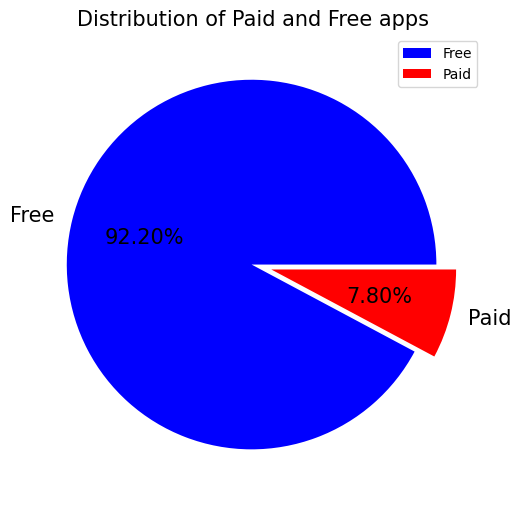

In [49]:
# What is the ratio of number of Paid apps and Free apps?
data = playstore_data['Type'].value_counts()
labels = ['Free','Paid']
# create pie chart
plt.figure(figsize=(6,6))
plt.pie(data,labels=labels,colors=['b','r'],autopct='%.2f%%',explode=(0.01,0.1),textprops={'fontsize':15})
plt.title('Distribution of Paid and Free apps',size=15,loc='center')
plt.legend()

**1. Why did you pick the specific chart?**


Pie charts show the size of items (called wedge) in one data series,proportional to the sum of the items. The data points in a pie chart are shown as a percentage of the whole pie

**2. What is/are the insight(s) found from the chart?**

We find that From the above graph we can see that 92% of apps in google play store are free and 8%are paid.

**3. Will the gained insights help creating a positive business impact?**

Are there any insights that lead to negative growth? Justify with specific reason.

Yes it impacts the bussiness decision because it is enough to know that the apps in store are mostly free , very less amount of apps are paid  so we have
to work on app to make apps free or less price and better.

#### Chart 2

Everyone           7893
Teen               1036
Mature 17+          393
Everyone 10+        322
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64


[Text(0, 0, 'Everyone'),
 Text(1, 0, 'Teen'),
 Text(2, 0, 'Mature 17+'),
 Text(3, 0, 'Everyone 10+'),
 Text(4, 0, 'Adults only 18+'),
 Text(5, 0, 'Unrated')]

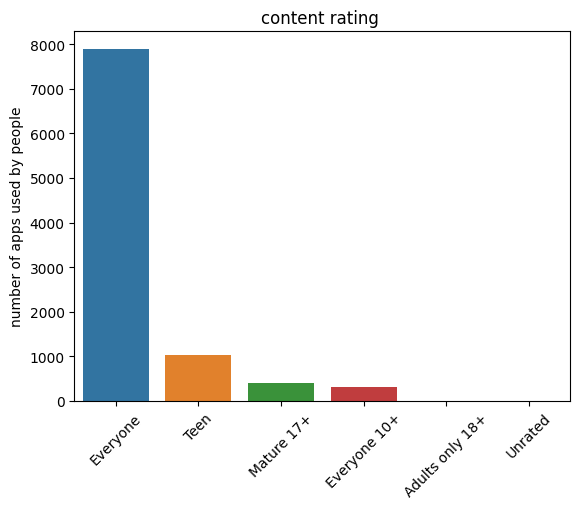

In [50]:
print(playstore_data['Content Rating'].value_counts())
data=playstore_data['Content Rating'].value_counts()
data_key= data.keys()
data_value= data.values
graph = sns.barplot(x=data_key,y=data_value)
graph.set_title('content rating ')
plt.ylabel('number of apps used by people')
graph.set_xticklabels(graph.get_xticklabels(),rotation=45)

**1. Why did you pick the specific chart?**

Bar chart is showing each data category in a frequency distribution. It is used to summarize a large data set in visual form.It is easily understood due to widespread use in business and the media.

**2. What is/are the insight(s) found from the chart?**

I visualized the bar graph of playstore dataset of column content rating value counts which show that how many users of which category that is everyone,teen, unrated etc.
A majority of the apps in the play store can be used by everyone.The remaining apps have various age restrictions

**3. Will the gained insights help creating a positive business impact?**

Are there any insights that lead to negative growth? Justify with specific reason.


It can help to improve the decision to make the apps in which category, which types of apps is mostly used in , which types of apps used by everyone.

Chart 3

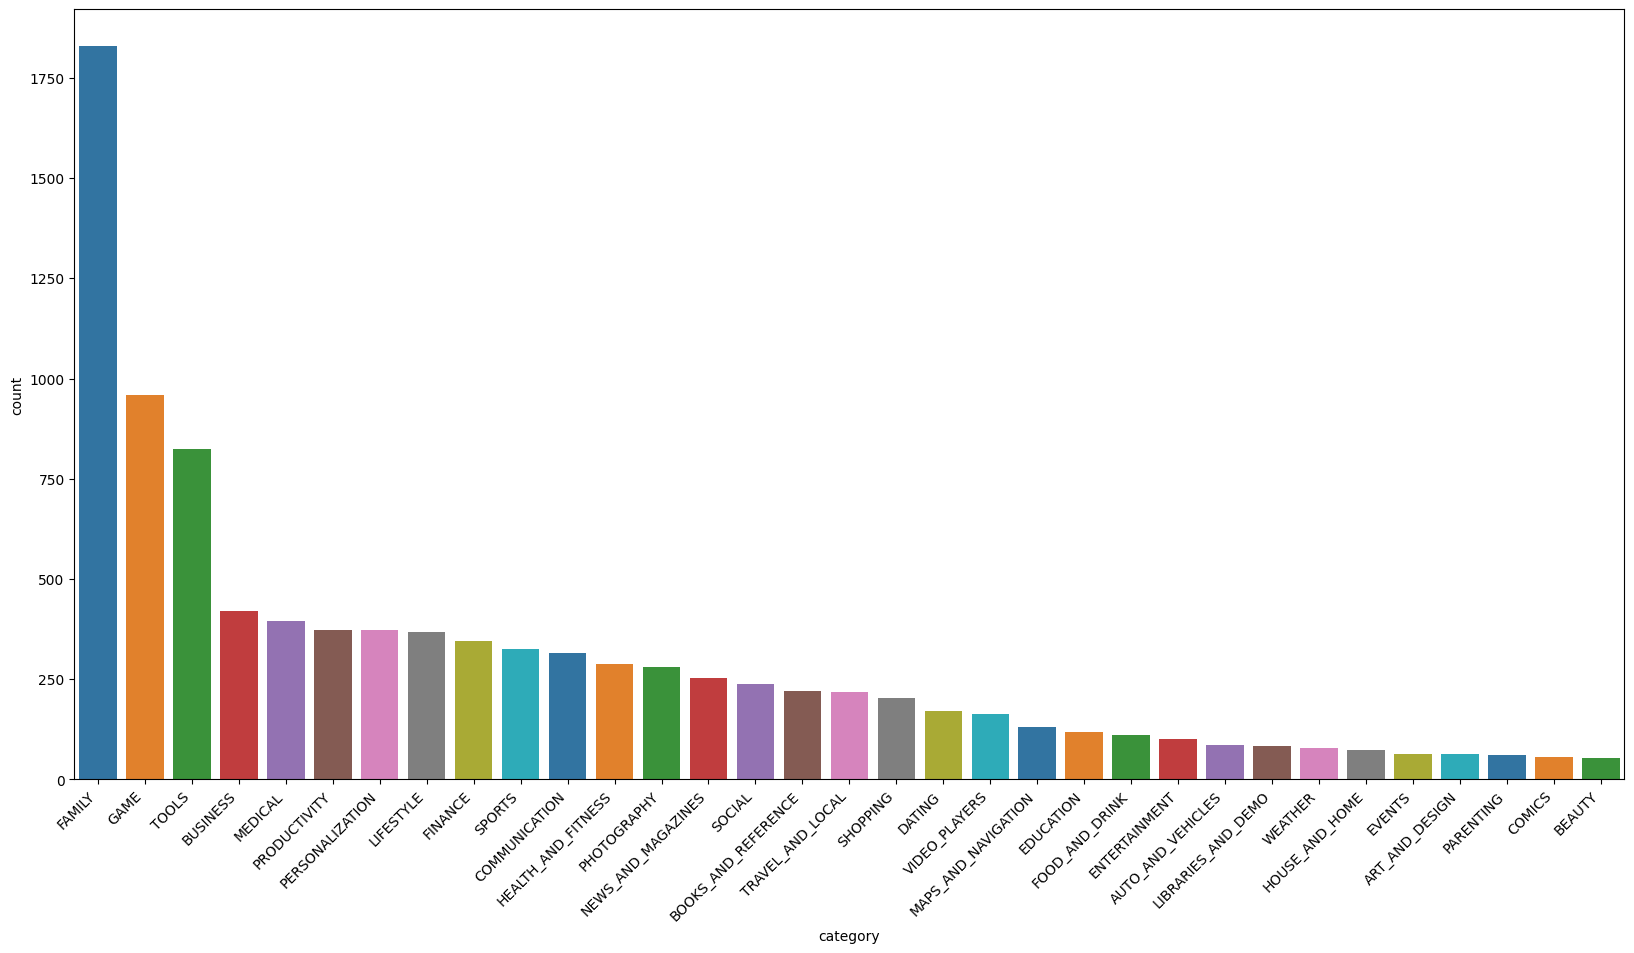

In [51]:
# count of Category which is availabe

y= playstore_data['Category'].value_counts()
x = playstore_data['Category'].value_counts().index
plt.figure(figsize=(20,10))
graph = sns.barplot(x=x,y=y,palette='tab10')
plt.xlabel('category')
plt.ylabel('count')
graph.set_xticklabels(graph.get_xticklabels(), rotation= 45, horizontalalignment='right',);

**1. Why did you pick the specific chart?**

This chart is better to visualise data category wise apps. It is widely use for readable representation.

**2. What is/are the insight(s) found from the chart?**

I found that the most of the apps on the playstore are from family category , game and at least are from beauty and comics.

**3. Will the gained insights help creating a positive business impact?**

Are there any insights that lead to negative growth? Justify with specific reason.

Gained insights help creating a positive impact on bussiness is to decide to make a apps is from which category because most of the app on playstore are from family categories.

Chart 4

Text(0, 0.5, 'count of rating')

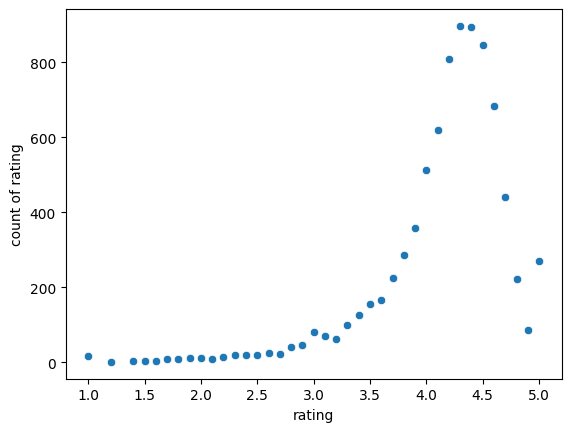

In [52]:
# playstore_data['Type'].value_counts()
x = playstore_data['Rating'].value_counts()
y = playstore_data['Rating'].value_counts().index
graph = sns.scatterplot(x=y,y=x)
plt.xlabel('rating')
plt.ylabel('count of rating')

**1. Why did you pick the specific chart?**

A scatter plot is a visual representation of how two variables relate to each other. You can use scatter plots to explore the relationship between two variables.

**2. What is/are the insight(s) found from the chart?**

We found that the maximum number of apps got the rating of 4 to 4.6 .

**3. Will the gained insights help creating a positive business impact?**
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, it can help creating a positive impact . We have to also check that the category of apps which got high rating will help us to make a decision to make apps in which category.

Chart 5

Text(0.5, 1.0, 'Total app installs in each category')

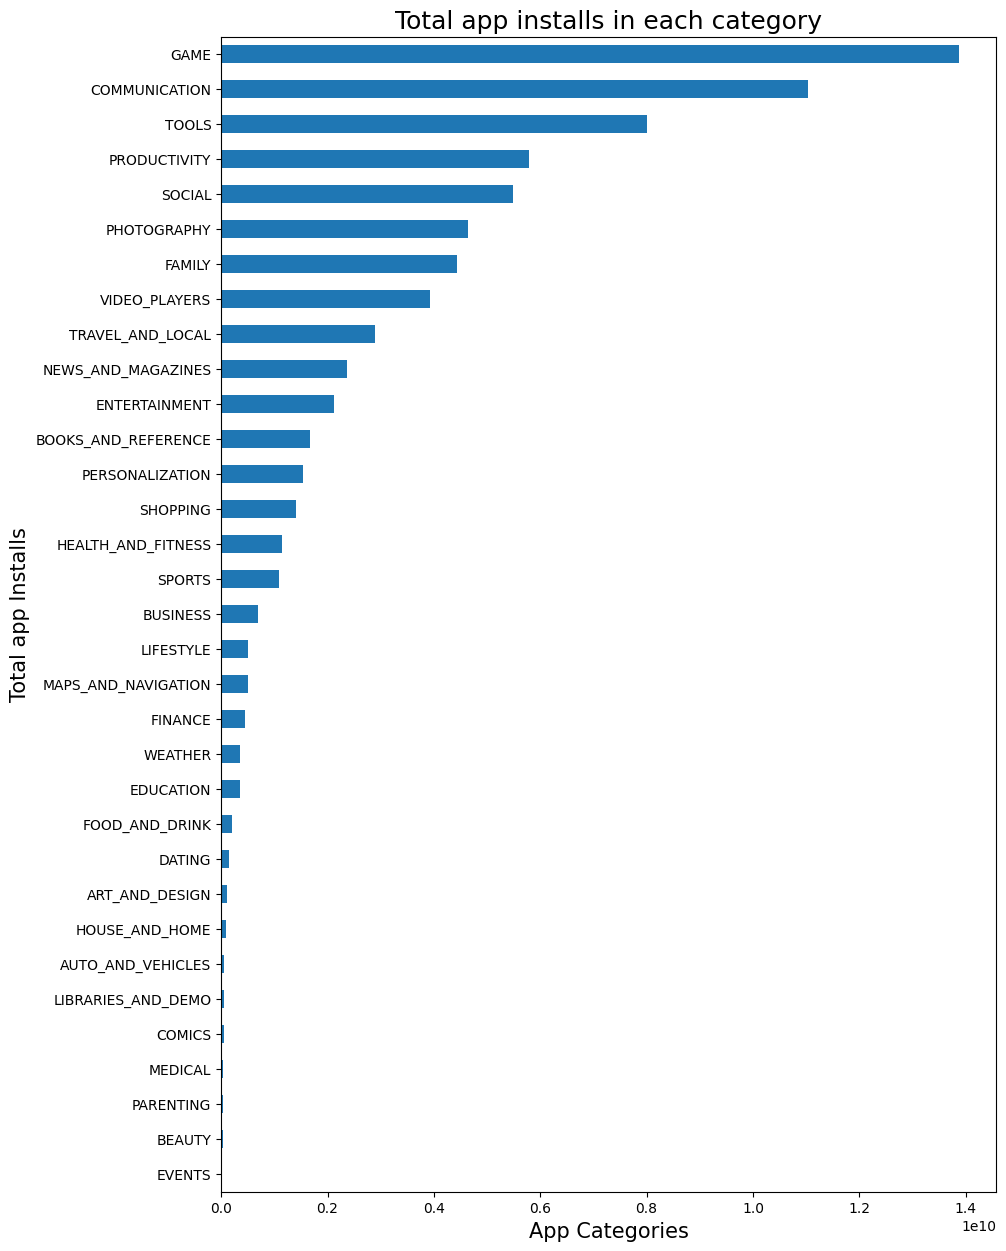

In [53]:
a = playstore_data.groupby(['Category'])['Installs'].sum().sort_values()
a.plot.barh(figsize=(10,15))
plt.ylabel('Total app Installs', fontsize = 15)
plt.xlabel('App Categories', fontsize = 15)
plt.xticks()
plt.title('Total app installs in each category', fontsize = 18)

**1. Why did you pick the specific chart?**

We use barh plots to visualize data in a horizontal bar chart format. A barh plot is a graphical representation of data using rectangular bars of equal width.The main advantage of using barh plots is that they allow for easy comparison of different categories or groups of data. The horizontal orientation of the bars also makes it easier to display labels for the categories along the y-axis, especially when the labels are long or numerous.

**2. What is/are the insight(s) found from the chart?**

This tells us the category of apps that has the maximum number of installs. The Game, Communication and Tools categories has the highest number of installs compared to other categories of apps.

**3. Will the gained insights help creating a positive business impact? **

Are there any insights that lead to negative growth? Justify with specific reason.

It gives the better understandings to promotion of apps which will help in our bussiness contest.

Chart 6

In [54]:
# What are the Top 10 installed apps in any category.
def findtop10incategory(str):
    str = str.upper()
    top10 = playstore_data[playstore_data['Category'] == str]
    top10apps = top10.sort_values(by='Installs', ascending=False).head(10)
    plt.figure(figsize=(15,6), dpi=100)
    plt.title('Top 10 Installed Apps',size = 20)
    graph = sns.barplot(x = top10apps.App, y = top10apps.Installs, palette= "icefire")
    graph.set_xticklabels(graph.get_xticklabels(), rotation= 45, horizontalalignment='right')

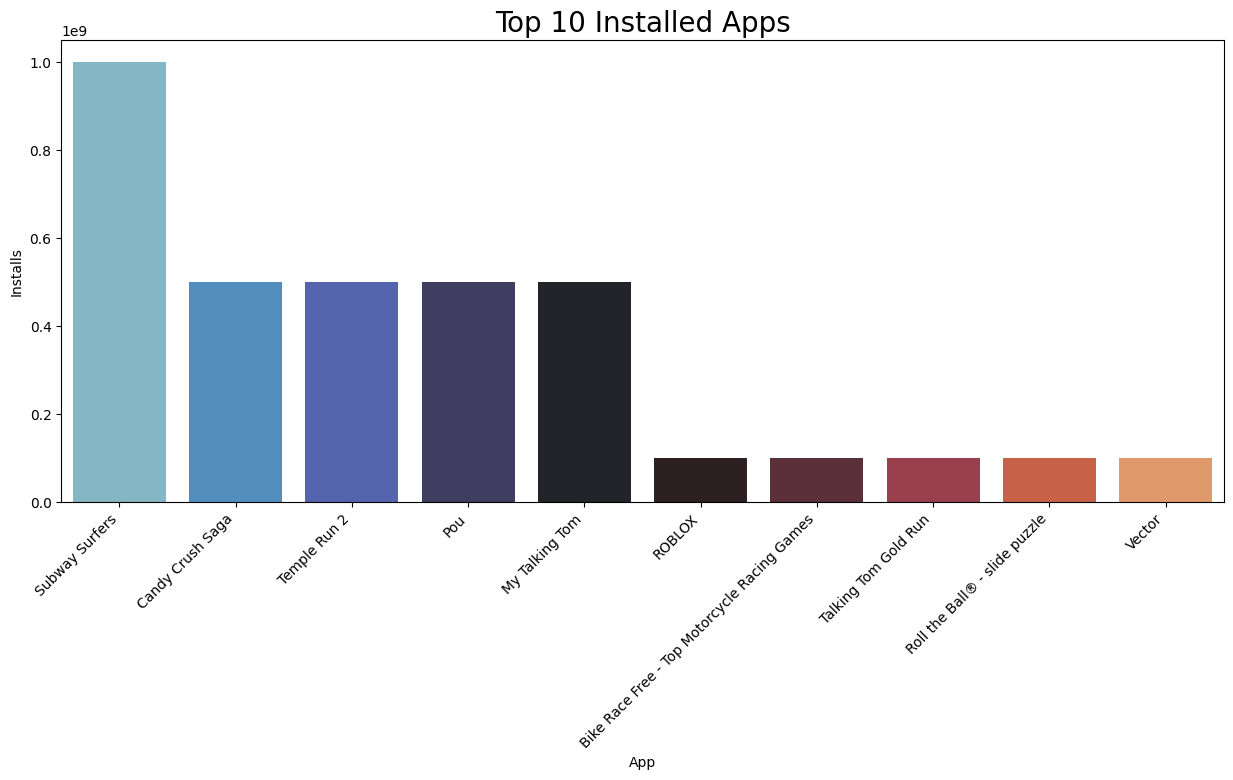

In [55]:
findtop10incategory("GAME")

**1. Why did you pick the specific chart?**

Barplots are a simple and effective way to visualize categorical data and communicate information to others.

**2. What is/are the insight(s) found from the chart?**

From the above graph we can see that in the Game category Subway Surfers,Candy Crush Saga, Temple Run 2 has the highest installs. In the same way I passed different category names to the function and got the top 10 installed apps.

**3. Will the gained insights help creating a positive business impact?**

Are there any insights that lead to negative growth? Justify with specific reason.

It usually helps us to know that the top apps available on playstore and also on the basis of this visualization we can take a decision to move forward to make a new approach for developing apps in which category.

Chart 7

In [56]:
#  first we mearge the both dataset on apps and use inner join

merged_df = pd.merge(playstore_data, user_review_data, on='App', how = "inner")
merged_df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,I hate,Negative,-0.800,0.900000


<ipython-input-57-a9cc123cb3fd>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(merged_df.corr(), annot= True, cmap='Greens')


Text(0.5, 1.0, ' Heatmap for merged Dataframe')

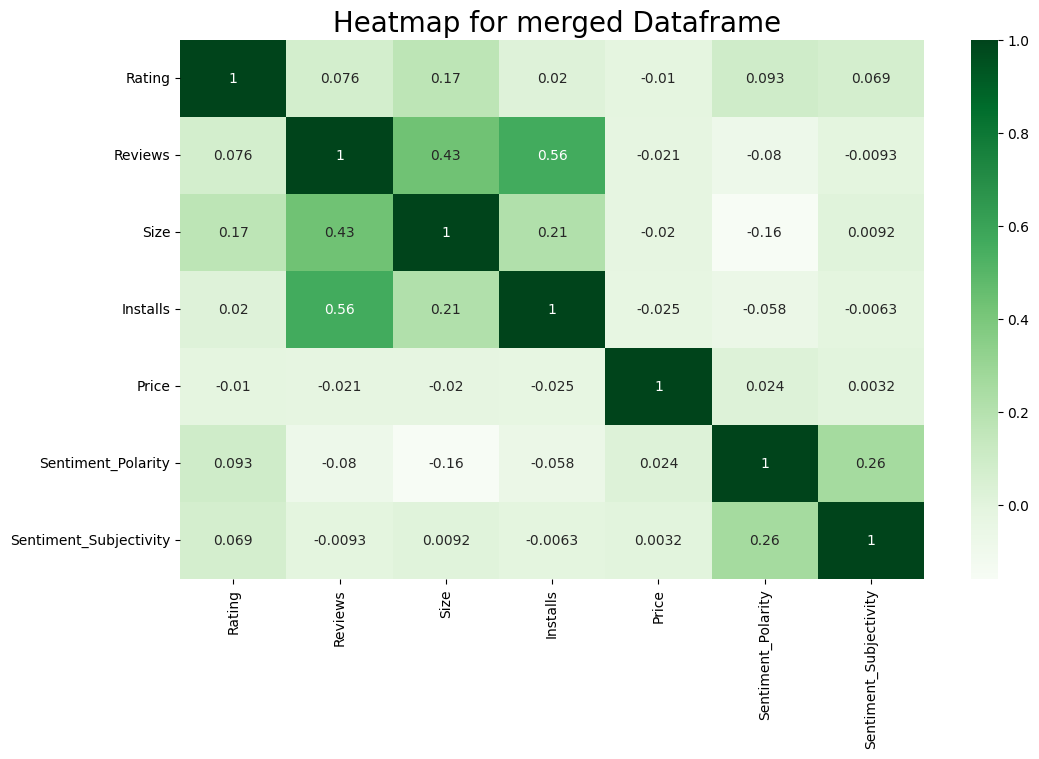

In [57]:
# Correlation heatmap
# Heat Map for the merged data frame
plt.figure(figsize = (12,7))
sns.heatmap(merged_df.corr(), annot= True, cmap='Greens')
plt.title(' Heatmap for merged Dataframe', size=20)

**1. Why did you pick the specific chart?**

Heatmaps are a useful tool for visualizing and analyzing complex data sets. They provide a quick and intuitive way to understand patterns and relationships within data, making them a valuable tool in many different fields.

**2. What is/are the insight(s) found from the chart?**

I found that the correlation of category based on different column.

**3. Will the gained insights help creating a positive business impact?**

Are there any insights that lead to negative growth? Justify with specific reason.

It can helps us to check weather the apps , rating , reviews and its sentiment analysis from correlation heatmap.

Chart 8

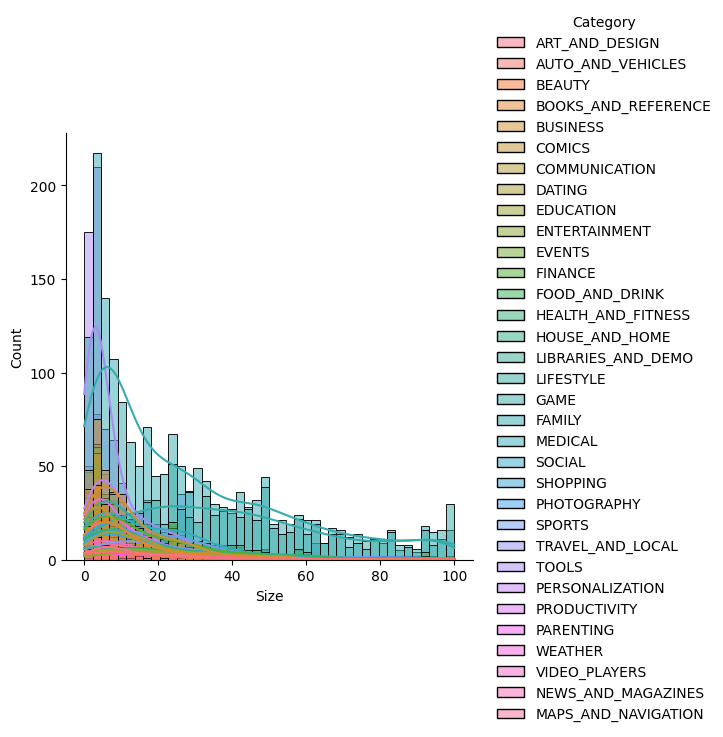

In [58]:
# in this dist plot we going to visulise the counting of size according to category wise.
sns.displot(data=playstore_data,x='Size',kde=True,hue='Category')

**1. Why did you pick the specific chart?**

A dist plot (short for "distribution plot") is a type of graphical representation that shows the distribution of a numerical variable in a dataset. It is a combination of a histogram and a kernel density plot.

**2. What is/are the insight(s) found from the chart?**

From the above graph we found that count of apps with respect to its size of apps according to the category.

**3. Will the gained insights help creating a positive business impact?**

Are there any insights that lead to negative growth? Justify with specific reason.

Here we used to compare the distributions of different variables or subsets of data. It help in bussiness to be useful in identifying differences or similarities between groups and can help us better understand the underlying patterns and relationships in the data.

Chart 9

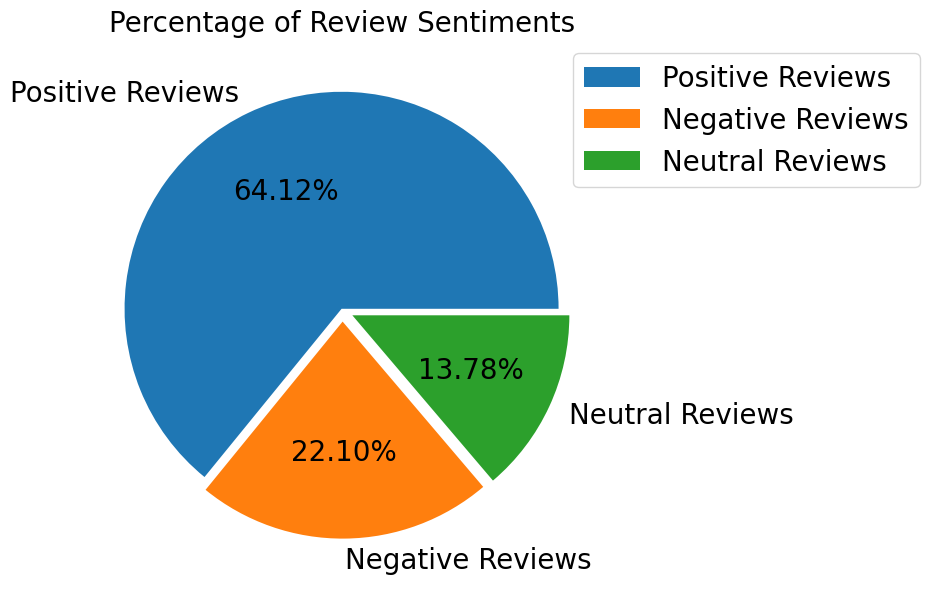

In [59]:
#  we are going to visulize the review dataset or sentiment analysis
counts = list(user_review_data['Sentiment'].value_counts())
labels = 'Positive Reviews', 'Negative Reviews','Neutral Reviews'
plt.rcParams['font.size'] = 20
plt.rcParams['figure.figsize'] = (7, 12)
plt.pie(counts, labels=labels, explode=[0.01, 0.05, 0.05],autopct="%.2f%%")
plt.title('Percentage of Review Sentiments', fontsize=20)
plt.axis('off')
plt.legend(bbox_to_anchor=(0.9, 0, 0.5, 1))
plt.show()

**1. Why did you pick the specific chart?**

Pie chart is a circular statistical graphic that is divided into slices to represent numerical proportions. Pie charts are often used to show the relative sizes of different categories or parts of a whole.

**2. What is/are the insight(s) found from the chart?**

I found that in above graph of user reviews, negative reviews - 22.10%, netural reviews -13.78 %, positive reviews - 64.12%

**3. Will the gained insights help creating a positive business impact?**

Are there any insights that lead to negative growth? Justify with specific reason.

Gained insights helps us to know the percentage of reviews from the user reviews . For impact on bussiness we have to analyse the reviews that which category and apps got the positive reviews and which one got negative reviews this will help us to improve the apps based on reviews we got by users.

Chart 10

In [60]:
# Positive user reviews data
positive_user_rview = user_review_data[user_review_data['Sentiment']=='Positive']
positive_user_rview.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


Text(0.5, 0, 'total number of positive reviews')

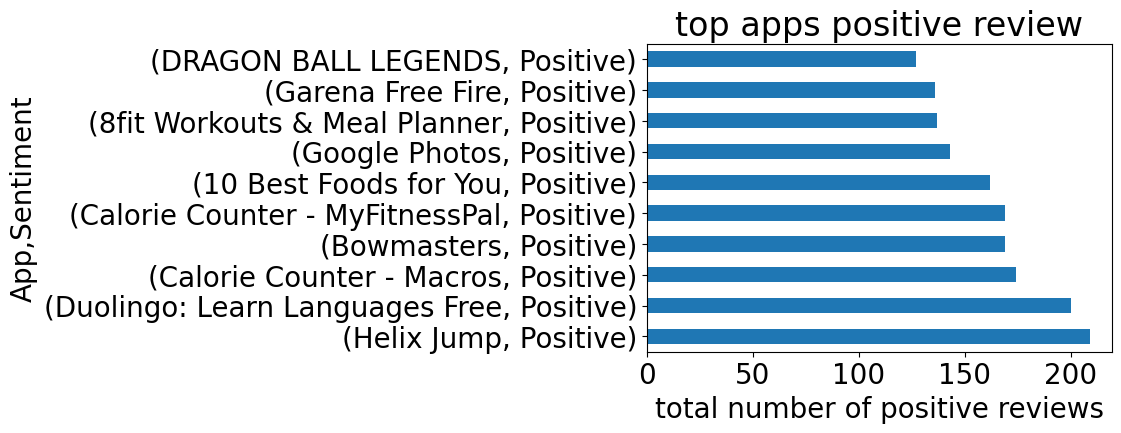

In [61]:
#  we analyse the app based  on sentiment
positive_user_rview.groupby('App')['Sentiment'].value_counts().nlargest(10).plot.barh(figsize=(6,4))
plt.title('top apps positive review')
plt.xlabel('total number of positive reviews')

**1. Why did you pick the specific chart?**

A barh graph, also known as a horizontal bar chart, is a graph that represents data using horizontal bars. The length of each bar is proportional to the value it represents, with the bars usually arranged horizontally from left to right. The horizontal orientation of the bars makes it easier to label and compare categories than a vertical bar chart, especially when the labels are long or when there are many categories.

**2. What is/are the insight(s) found from the chart?**

I used barh graph and  got insights about 10 largest apps and its positive sentiments and number of total positive reviews.

**3. Will the gained insights help creating a positive business impact?**

Are there any insights that lead to negative growth? Justify with specific reason.

Top app sentiment reviews help us to take some new bussiness decision to make apps better for future .

Chart 11

In [62]:
# Apps with the highest number of negative reviews
negative_user_rv=user_review_data[user_review_data['Sentiment']=='Negative']
negative_user_rv

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
32,10 Best Foods for You,No recipe book Unable recipe book.,Negative,-0.500000,0.500000
43,10 Best Foods for You,Waste time It needs internet time n ask calls ...,Negative,-0.200000,0.000000
68,10 Best Foods for You,Faltu plz waste ur time,Negative,-0.200000,0.000000
85,10 Best Foods for You,Crap Doesn't work,Negative,-0.800000,0.800000
95,10 Best Foods for You,Boring. I thought actually just texts that's i...,Negative,-0.325000,0.475000
...,...,...,...,...,...
64215,Housing-Real Estate & Property,Horrible app. I wanted list property get aroun...,Negative,-0.528571,0.717262
64216,Housing-Real Estate & Property,Worst app. We get nothing Time waste . They up...,Negative,-0.400000,0.250000
64220,Housing-Real Estate & Property,"No response support team. After I login, unabl...",Negative,-0.377778,0.533333
64226,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000


Text(0.5, 0, 'Total number of negative reviews')

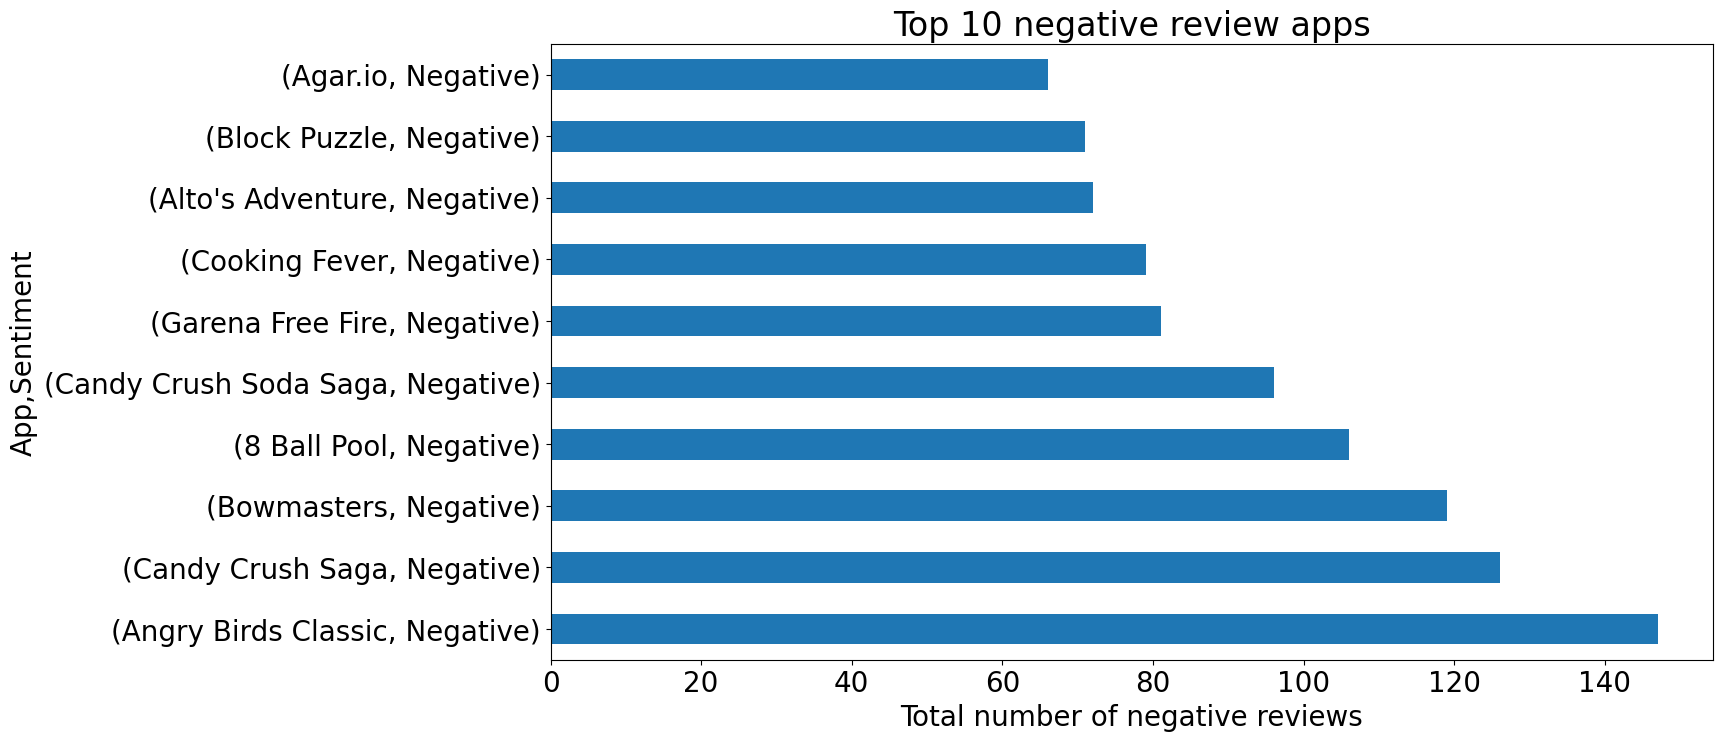

In [63]:
negative_user_rv.groupby('App')['Sentiment'].value_counts().nlargest(10).plot.barh(figsize=(15,8))
plt.title("Top 10 negative review apps")
plt.xlabel('Total number of negative reviews')


**1. Why did you pick the specific chart?**

A barh graph, also known as a horizontal bar chart, is a graph that represents data using horizontal bars. The length of each bar is proportional to the value it represents, with the bars usually arranged horizontally from left to right. The horizontal orientation of the bars makes it easier to label and compare categories than a vertical bar chart, especially when the labels are long or when there are many categories.

**2. What is/are the insight(s) found from the chart?**

I got apps and negative sentiment , total number of negative reviews and top 10 negative reviews.

**3.Will the gained insights help creating a positive business impact?**

Are there any insights that lead to negative growth? Justify with specific reason.

Top app sentiment reviews help us to take some new bussiness decision to make apps better for future apps .

Chart 12 Pair Plot

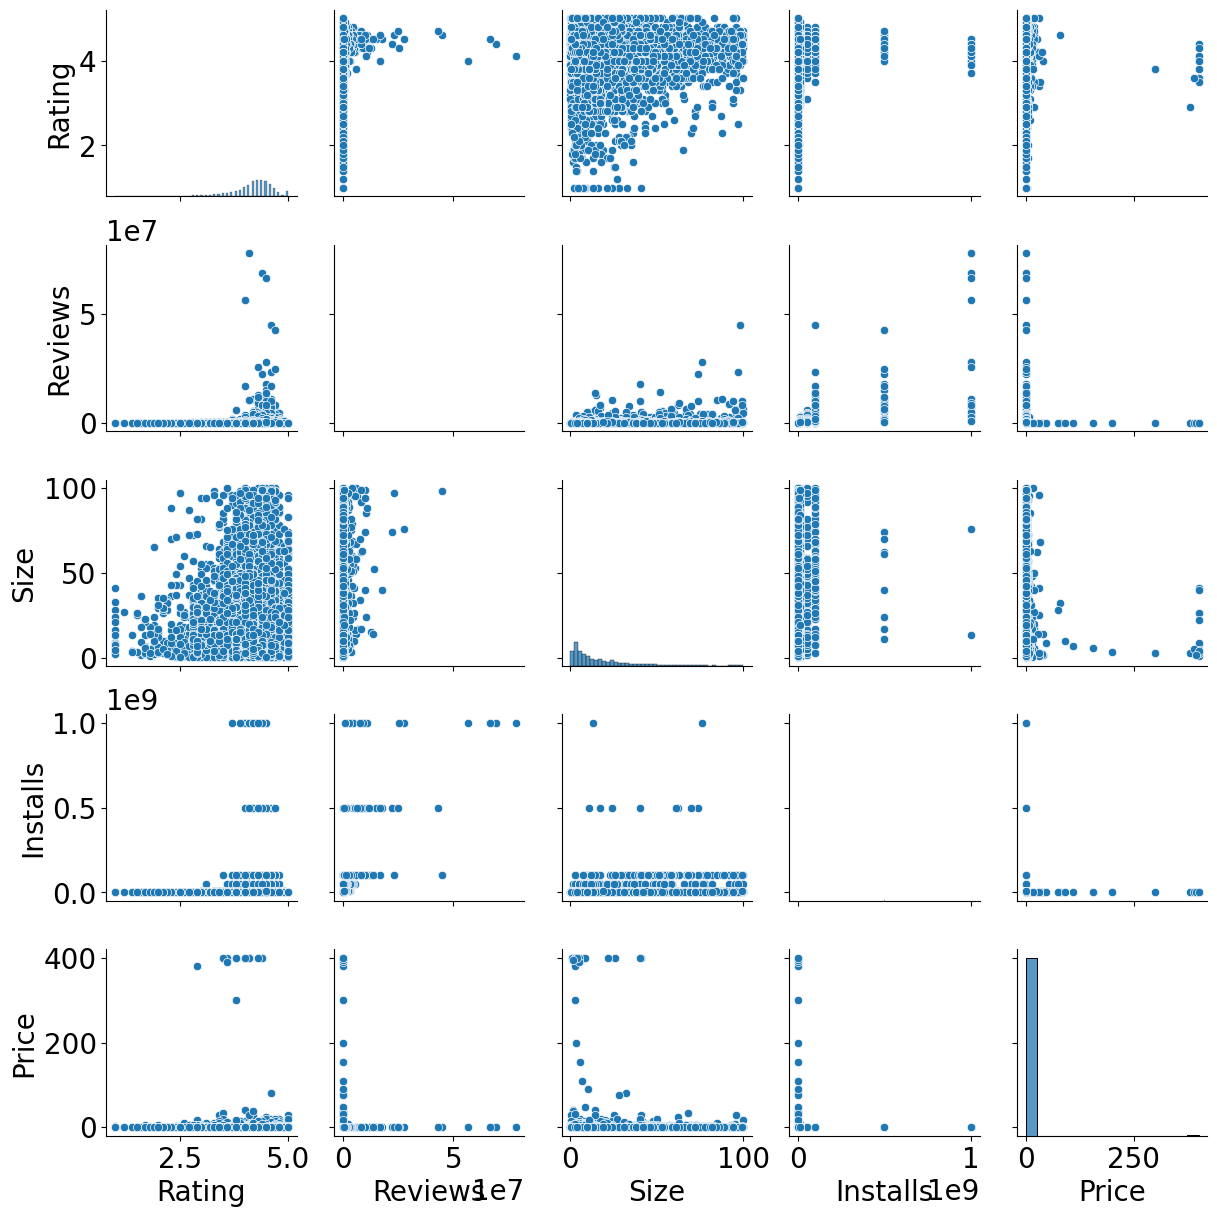

In [64]:
#  pairwise relationships between different variables in a dataset.
sns.pairplot(data=playstore_data)

**1. Why did you pick the specific chart?**

A pair plot is a type of data visualization that shows pairwise relationships between variables in a dataset. It is essentially a matrix of scatter plots, where each scatter plot shows the relationship between two variables. The diagonal of the matrix shows a histogram or density plot of each variable.

**2. What is/are the insight(s) found from the chart?**

Pair plots are useful for exploring the relationships between multiple variables simultaneously. All variable rating,reviews,size,installs,price  simultaneously show the relationship between each variable.

## **5. Solution to Business Objective**

**What do you suggest the client to achieve Business Objective ?**

Explain Briefly.

Facilitating app distribution: The Play Store's primary objective is to facilitate the distribution of apps to users of Android devices. This includes providing a platform for developers to upload their apps, managing the review and approval process, and making the apps available for download to users.

Maximizing app downloads: The Play Store aims to maximize the number of app downloads by users. This is achieved through various means such as featuring popular apps, providing personalized app recommendations, and optimizing search results.

Generating revenue: The Play Store generates revenue through the sale of paid apps, in-app purchases, and advertising. The platform aims to optimize revenue generation by providing developers with tools and resources to monetize their apps and by offering targeted advertising opportunities to advertisers.

Ensuring app quality and security: The Play Store aims to ensure that the apps available on its platform are of high quality and free from malware. This is achieved through a rigorous review and approval process, as well as ongoing monitoring and enforcement of policies.

Supporting developers: The Play Store aims to support developers by providing them with tools and resources to build and distribute their apps, as well as access to a large user base. This includes providing analytics and other performance metrics, as well as opportunities for promotion and monetization.

Overall, the Play Store's business objectives are centered around facilitating app distribution, maximizing app downloads, generating revenue, ensuring app quality and security, and supporting developers.

---Client have to more focus on this to achieve bussiness objective.

1.Developing apps related to the least categories as they are not explored much. Like events and beauty.

2.Most of the apps are Free, so focusing on free app is more important. Focusing more on content available for Everyone will increase the chances of getting the highest installs.

3.They need to focus on updating their apps regularly, so that it will attract more users.

4.They need to keep in mind that the sentiments of the user keep varying as they keep using the app, so they should focus more on users needs and features.

# **Conclusion**

Overall conclusion of the playstore apps and user reviews dataset is the main vision to improve the quality and performance of application based on the customer rating and reviews . Positive reviews helps us to move forward to make next move toward our progress and negative reviews helps us to know our mistakes we have done previously in application so we have to improve that.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***